In [1]:
from scivision import default_catalog, load_pretrained_model
from scivision import load_dataset
import matplotlib.pyplot as plt

## Query the scivision data catalog

In [2]:
compatible_datasources = default_catalog.compatible_datasources("image-classifiers").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
2,data-002,None,"(TaskEnum.classificiation,)","(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,True,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection, TaskEnum.classific...","(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,True,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."
7,oxford-pet,Oxford-IIIT pet dataset,"(TaskEnum.classificiation,)","(computer-vision, pets, cats and dogs)",https://github.com/pwochner/oxford_pets_data_repo,image,False,"(Oxford University,)","(pets, classification)"


Identify the dataset that we're interested in:

In [3]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'oxford-pet']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
7,oxford-pet,Oxford-IIIT pet dataset,"(TaskEnum.classificiation,)","(computer-vision, pets, cats and dogs)",https://github.com/pwochner/oxford_pets_data_repo,image,False,"(Oxford University,)","(pets, classification)"


## Load the dataset

In [4]:
data_url = target_datasource['url'].item()

In [5]:
data_config = load_dataset(data_url)
data_config

data:
  args:
    path: https://raw.githubusercontent.com/pwochner/oxford_pets_data_repo/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [6]:
images = data_config.oxford_pets().to_dask()

/Users/pwochner/opt/miniconda3/envs/scivision/lib/python3.9/site-packages/xarray/core/dataarray.py:1195: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [7]:
test_image = images[4000]

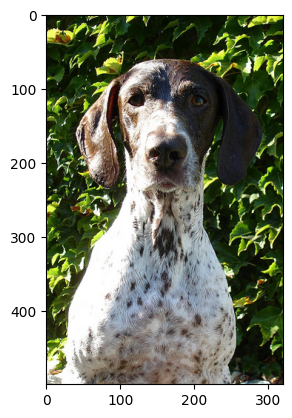

In [8]:
plt.imshow(test_image)

In [9]:
type(test_image)

xarray.core.dataarray.DataArray

## Load classifier from Scivision

In [10]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == "catdog-classifier"].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/pwochner/catdog_classification_model', scheme='https', host='github.com', tld='com', host_type='domain', path='/pwochner/catdog_classification_model')

In [11]:
# Inspecting model entry and its metadata in the default catalog
models_catalog[models_catalog.name == "catdog-classifier"]

,name,description,tasks,url,pkg_url,format,pretrained,labels_required,institution,tags
13,catdog-classifier,None,"(TaskEnum.classificiation,)",https://github.com/pwochner/catdog_classificat...,git+https://github.com/pwochner/catdog_classif...,image,True,False,"(alan-turing-institute,)","(2D, pets)"


In [12]:
# catdog_classification_model = load_pretrained_model(model_repo, model="CatDogClassifier", allow_install=True)
catdog_classification_model = load_pretrained_model(model_repo, allow_install=True)

In [13]:
catdog_classification_model.predict(test_image)

'dog'